In [1]:
from os.path import exists

data_dir = 'utility/data'

assert exists(f'{data_dir}/insta_data.csv'), 'Loan data file is missing.'

In [2]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/insta_data.csv')
df = data
tt = pd.read_csv(f'{data_dir}/tiktok_data.csv')

In [3]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from wordcloud import WordCloud

The following is data of @washu Instagram Analytics from 1/1/24 to 6/21/24:

In [4]:
data.head(10)

,ID,Date,Day of week,Time of day,Reel/Slideshow/Pic,Likes,Comments,Shares,Saves/Bookmarks,Accounts Reached,...,New Followers,Beauty/Aesthetic,Students,Commencement,WashU28,Dorm,Study/Academics/Rsh,Holiday/Special Day,Chancellor,Sports
0,1,6/21,Friday,11:24,Slide,1304,21,69,9,14579,...,0.0,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6/20,Thursday,8:57,Slide,2425,2,67,15,18196,...,5.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6/13,Thursday,NaN,Reel,1349,4,130,59,16742,...,2.0,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6/6,Thursday,8:52,Slide,4578,23,374,64,35324,...,13.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5/31,Friday,9:32,Picture,1904,8,38,7,20546,...,0.0,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,x
5,6,5/30,Thursday,NaN,Reel,2352,15,331,52,25282,...,6.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,5/27,Monday,8:11,Picture,1423,2,23,5,17745,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN
7,8,5/22,Wednesday,15:07,Slide,3464,9,258,16,23884,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x
8,9,5/21,Tuesday,12:03,Slide,2340,16,49,8,18380,...,0.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,5/20,Monday,16:33,Slide,1691,24,102,8,14833,...,1.0,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN


And the following are the list of features the tiktoks will be analyzed based on:

In [5]:
print(data.columns)

Index(['ID', 'Date', 'Day of week', 'Time of day', 'Reel/Slideshow/Pic',
       'Likes', 'Comments', 'Shares', 'Saves/Bookmarks', 'Accounts Reached',
       'Accounts Engaged/Reel Interactions', 'Profile Activity',
       'Non Followers %', 'Impressions/Plays ', 'Reel Replays', 'from Home',
       'from Profile', 'from Explore Pg', 'Hashtags', 'Mentions',
       'Video Duration (s)', 'Profile Vists', 'New Followers',
       'Beauty/Aesthetic', 'Students', 'Commencement', 'WashU28', 'Dorm',
       'Study/Academics/Rsh', 'Holiday/Special Day', 'Chancellor', 'Sports'],
      dtype='object')


The following is a scatterplot of the views WashU Recieved over time:

## I) Analyzing Individual Features over Time (Date)

### 1. WashU Views v.s. Time

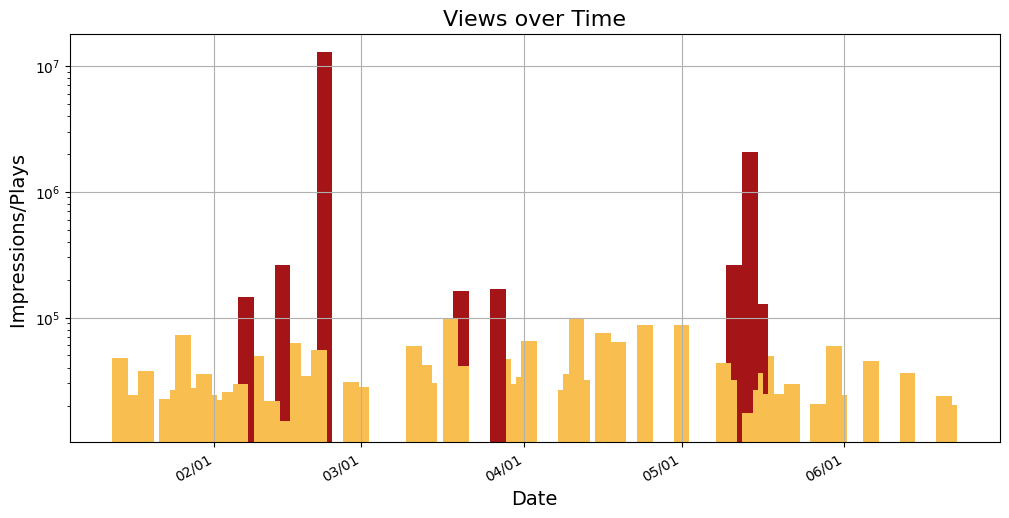

In [6]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d', errors='coerce')
colors = ['#f8be50' if views < 10**5 else '#a51417' for views in df['Impressions/Plays ']]

# bar graph
plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Impressions/Plays '], width=3, color=colors) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Impressions/Plays ', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()
# Log scale
plt.yscale('log')

plt.show()

now doing it for just reels and slideshows individually

In [7]:
df_reels = df[df['Reel/Slideshow/Pic'] == 'Reel']
df_slides = df[df['Reel/Slideshow/Pic'] == 'Slide']
df_pic = df[df['Reel/Slideshow/Pic'] == 'Picture']

C:\Users\Lionb\AppData\Local\Temp\ipykernel_12680\1403076938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reels['Date'] = pd.to_datetime(df_reels['Date'], format='%m/%d', errors='coerce')
C:\Users\Lionb\AppData\Local\Temp\ipykernel_12680\1403076938.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slides['Date'] = pd.to_datetime(df_slides['Date'], format='%m/%d', errors='coerce')
C:\Users\Lionb\AppData\Local\Temp\ipykernel_12680\1403076938.py:4: SettingWithCopyWarning: 
A value is trying to b

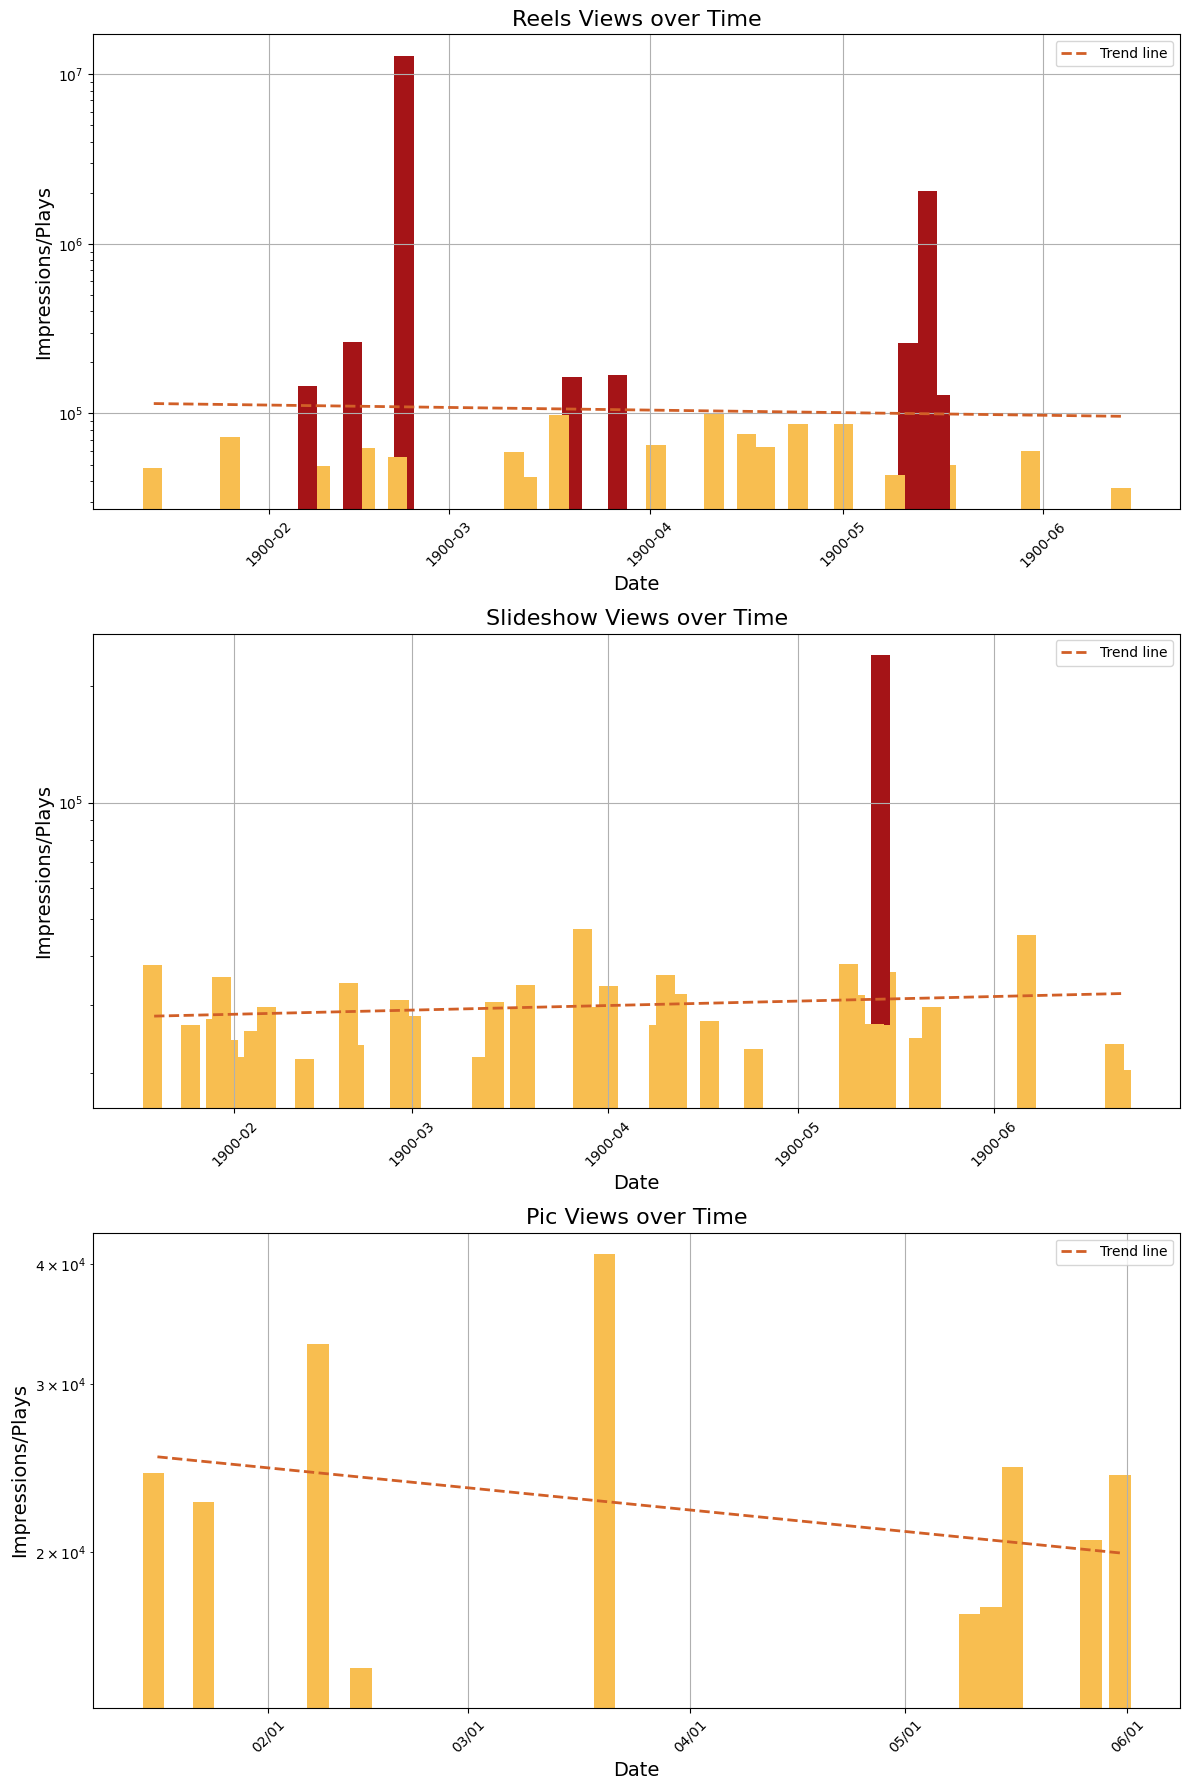

In [8]:
# Convert 'Date' column to datetime format with error handling
df_reels['Date'] = pd.to_datetime(df_reels['Date'], format='%m/%d', errors='coerce')
df_slides['Date'] = pd.to_datetime(df_slides['Date'], format='%m/%d', errors='coerce')
df_pic['Date'] = pd.to_datetime(df_pic['Date'], format='%m/%d', errors='coerce')

df_reels.dropna(subset=['Date'], inplace=True)
df_slides.dropna(subset=['Date'], inplace=True)
df_pic.dropna(subset=['Date'], inplace=True)

# Define a function to create the bar graphs
def create_bar_graph(df, title, ax):
    colors = ['#f8be50' if views < 10**5 else '#a51417' for views in df['Impressions/Plays ']]
    ax.bar(df['Date'], df['Impressions/Plays '], width=3, color=colors)
    
    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Impressions/Plays', fontsize=14)
    ax.grid(True)
    
    # Set y-axis to log scale
    ax.set_yscale('log')
    
    # Rotate x-axis labels
    ax.xaxis.set_tick_params(rotation=45)
    
    # Trend line
    dates = df['Date'].map(pd.Timestamp.toordinal)
    z = np.polyfit(dates, np.log(df['Impressions/Plays ']), 1)
    p = np.poly1d(z)
    trend_line = np.exp(p(dates))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    
    ax.plot(df['Date'], trend_line, linestyle='--', color='#d15f27', linewidth=2, label='Trend line')
    ax.legend()



# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Create bar graphs for each type
create_bar_graph(df_reels, 'Reels Views over Time', axes[0])
create_bar_graph(df_slides, 'Slideshow Views over Time', axes[1])
create_bar_graph(df_pic, 'Pic Views over Time', axes[2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 2. WashU {Views + Likes + Comments + Shares + Saves} V.S. Time

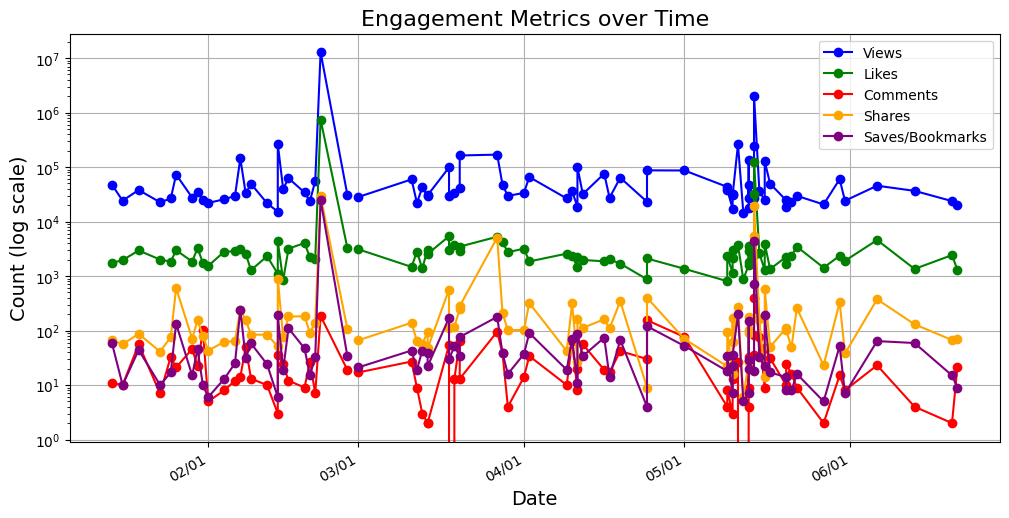

In [9]:
plt.figure(figsize=(12, 6))

# Views' vs 'Date'
plt.plot(df['Date'], df['Impressions/Plays '], marker='o', linestyle='-', color='blue', label='Views')

# 'Likes' vs 'Date'
plt.plot(df['Date'], df['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# 'Comments' vs 'Date'
plt.plot(df['Date'], df['Comments'], marker='o', linestyle='-', color='red', label='Comments')

#'Shares' vs 'Date'
plt.plot(df['Date'], df['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# 'Saves/Bookmarks' vs 'Date'
plt.plot(df['Date'], df['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

plt.title('Engagement Metrics over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.legend()
plt.gcf().autofmt_xdate()



plt.show()

lets focus on shares!

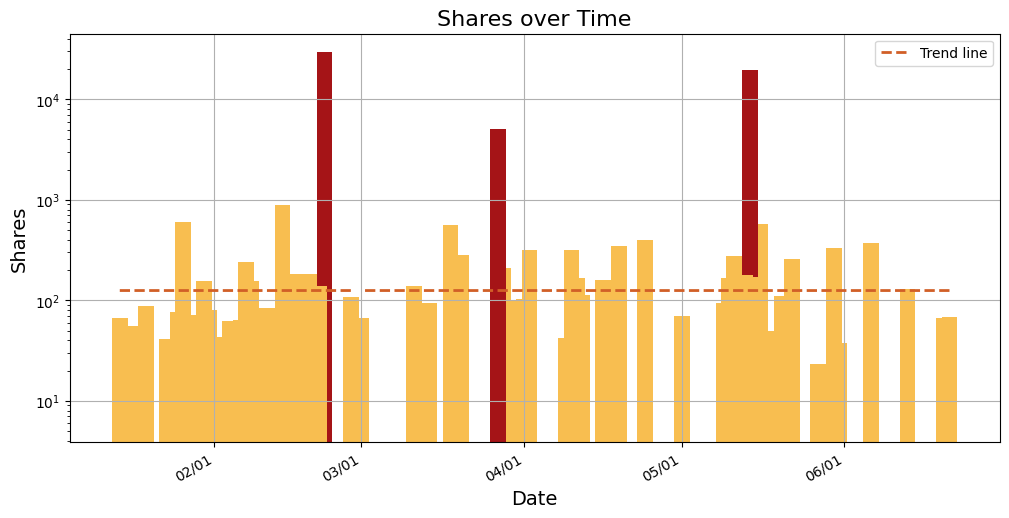

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d', errors='coerce')
colors = ['#f8be50' if shares < 10**3 else '#a51417' for shares in df['Shares']]

# bar graph
plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Shares'], width=3, color=colors) 


plt.title('Shares over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Shares', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()
# Log scale
plt.yscale('log')

dates = df['Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(dates, np.log(df['Shares']), 1)
p = np.poly1d(z)
trend_line = np.exp(p(dates))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
    
plt.plot(df['Date'], trend_line, linestyle='--', color='#d15f27', linewidth=2, label='Trend line')
plt.legend()

plt.show()

Like to View Ratio

The ID of the highest like percentage is: 17


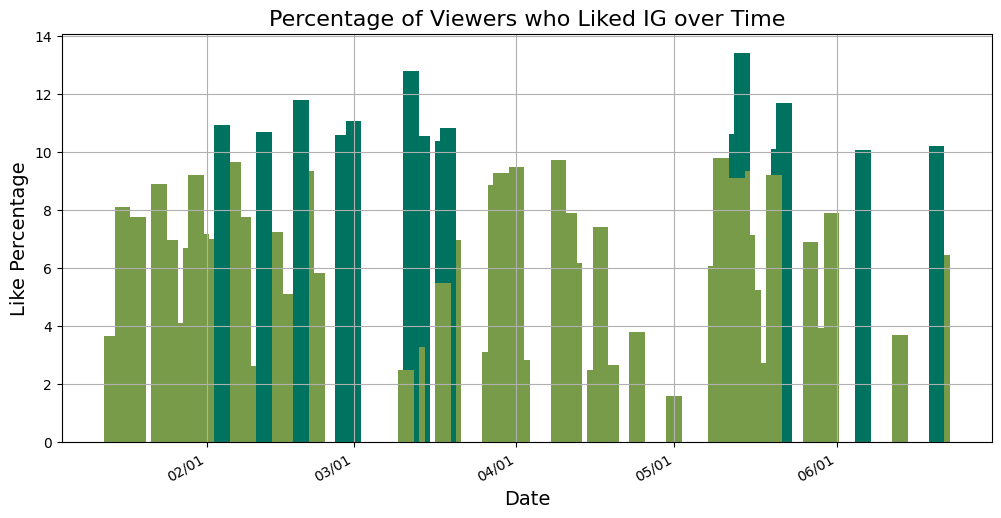

In [11]:
import matplotlib.dates as mdates

# Calculate Like_Percent
df['Like_Percent'] = df['Likes'] / df['Impressions/Plays '] * 100

max_like_percent_index = df['Like_Percent'].idxmax()
max_like_percent_id = df.loc[max_like_percent_index, 'ID']

print(f'The ID of the highest like percentage is: {max_like_percent_id}')

colors = ['#007360' if like_percent > 10 else '#789b4a' for like_percent in df['Like_Percent']]

# 'Like_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Date'], df['Like_Percent'], width=3, color=colors)

plt.title('Percentage of Viewers who Liked IG over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Like Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

In [12]:
goodlikes = df['Like_Percent'] > 10

# Filter the DataFrame based on the 'goodlikes' condition
df_goodlikes = df[goodlikes]

# correlation matrix
correlation_matrix = df_goodlikes.corr()

# correlation of 'goodlikes' with other features:
goodlikes_correlation = correlation_matrix['Likes']
print("\nCorrelation of 'Likes' with other features:")
print(goodlikes_correlation)


Correlation of 'Likes' with other features:
ID                                   -0.241795
Likes                                 1.000000
Comments                              0.952969
Shares                                0.998968
Saves/Bookmarks                       0.998810
Accounts Reached                      0.999646
Accounts Engaged/Reel Interactions    0.911272
Profile Activity                      0.982595
Non Followers %                       0.919069
Impressions/Plays                     0.999196
Reel Replays                               NaN
from Home                             0.998799
from Profile                          0.301027
from Explore Pg                       0.996630
Video Duration (s)                         NaN
Profile Vists                         0.982485
New Followers                         0.997750
Like_Percent                          0.671086
Name: Likes, dtype: float64


C:\Users\Lionb\AppData\Local\Temp\ipykernel_12680\1205799070.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_goodlikes.corr()


The ID of the highest comment percentage is: 74


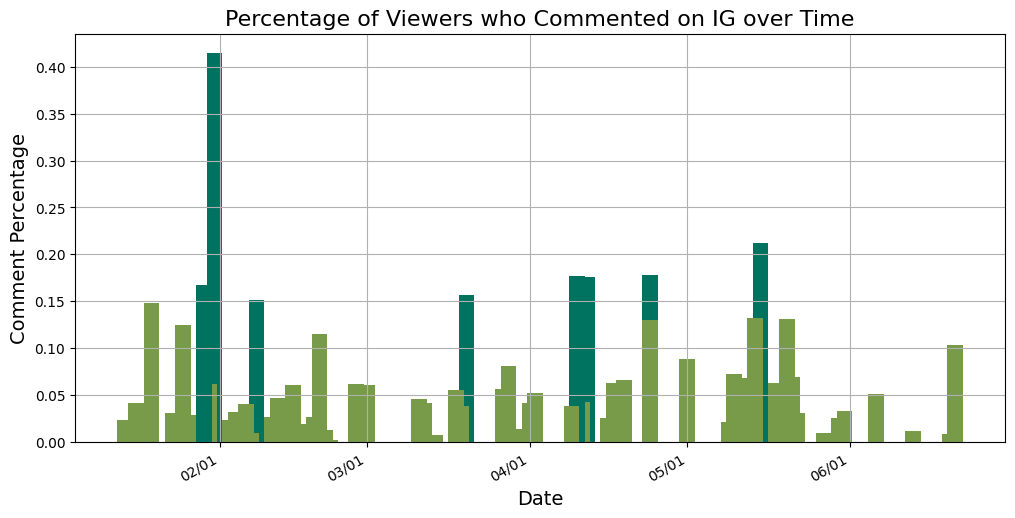

In [13]:
import matplotlib.dates as mdates

# Calculate Like_Percent
df['Comm_Percent'] = df['Comments'] / df['Impressions/Plays '] * 100

max_comm_percent_index = df['Comm_Percent'].idxmax()
max_comm_percent_id = df.loc[max_comm_percent_index, 'ID']

print(f'The ID of the highest comment percentage is: {max_comm_percent_id}')

colors = ['#007360' if comm_percent > .15 else '#789b4a' for comm_percent in df['Comm_Percent']]

# 'Comm_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Date'], df['Comm_Percent'], width=3, color=colors)

plt.title('Percentage of Viewers who Commented on IG over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Comment Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

The ID of the highest share percentage is: 17


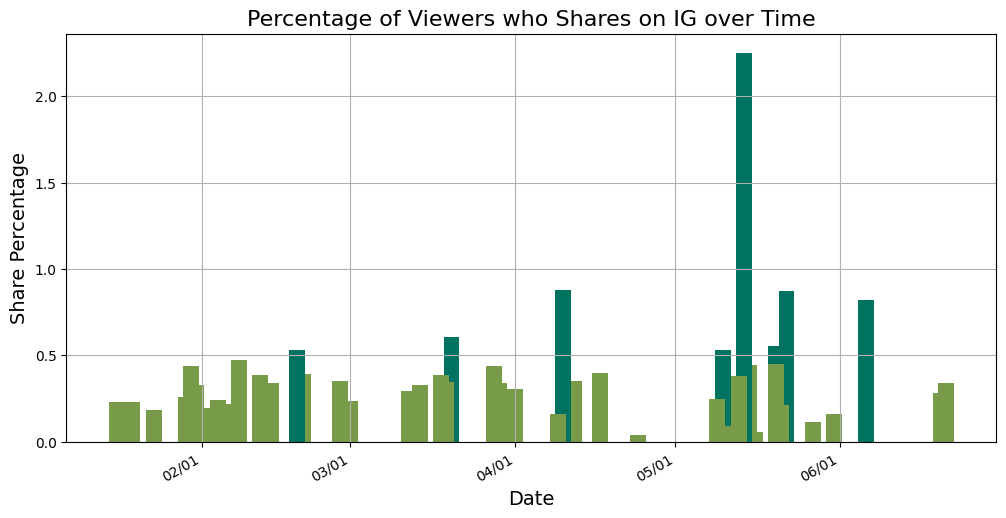

In [72]:
import matplotlib.dates as mdates

# Calculate Like_Percent
df['Shares_Percent'] = df['Shares'] / df['Impressions/Plays '] * 100

max_shares_percent_index = df['Shares_Percent'].idxmax()
max_shares_percent_id = df.loc[max_shares_percent_index, 'ID']

print(f'The ID of the highest share percentage is: {max_shares_percent_id}')

colors = ['#007360' if shares_percent > .5 else '#789b4a' for shares_percent in df['Shares_Percent']]

# 'Comm_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Date'], df['Shares_Percent'], width=3, color=colors)

plt.title('Percentage of Viewers who Shares on IG over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Share Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

The ID of the highest share percentage is: 17


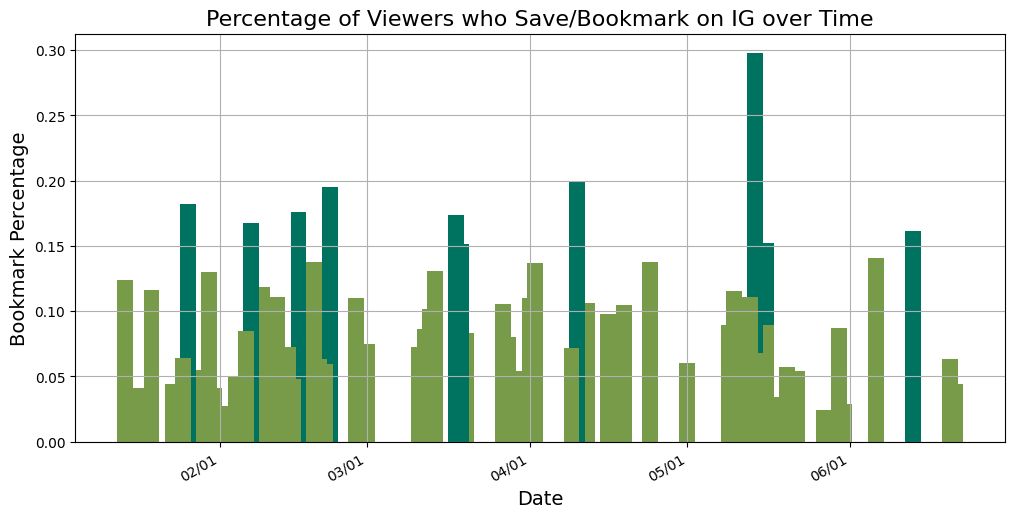

In [26]:
import matplotlib.dates as mdates

# Calculate Like_Percent
df['Books_Percent'] = df['Saves/Bookmarks'] / df['Impressions/Plays '] * 100

max_books_percent_index = df['Books_Percent'].idxmax()
max_books_percent_id = df.loc[max_books_percent_index, 'ID']

print(f'The ID of the highest share percentage is: {max_books_percent_id}')

colors = ['#007360' if books_percent > .15 else '#789b4a' for books_percent in df['Books_Percent']]

# 'Comm_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Date'], df['Books_Percent'], width=3, color=colors)

plt.title('Percentage of Viewers who Save/Bookmark on IG over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Bookmark Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

plt.show()

### 4.Reel Replays (full duration) V.S. Date

In [36]:
df_reels = df_reels.copy()
df_reels['View_Percent'] = df_reels['Reel Replays'] / (df_reels['Impressions/Plays '] - df_reels['Reel Replays']) *100

The ID of the highest share percentage is: 59


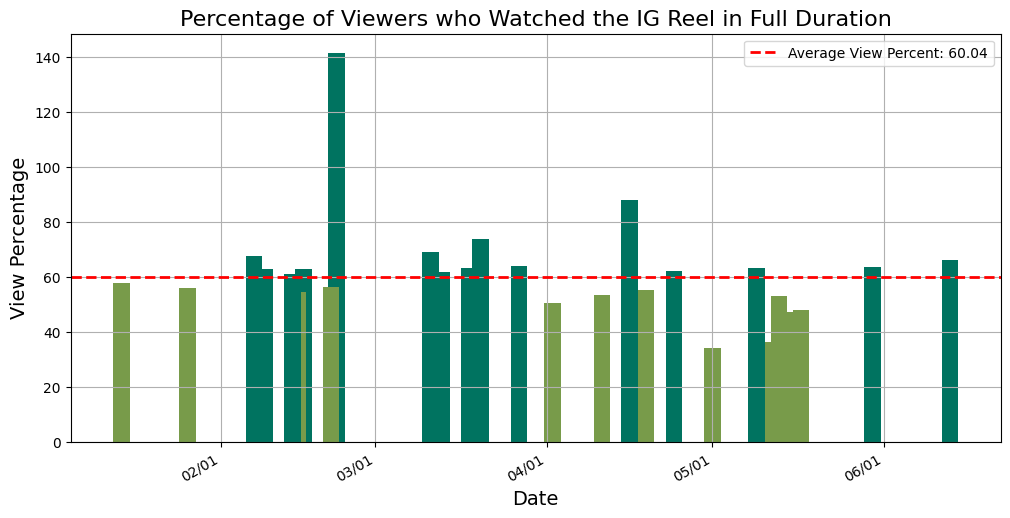

In [43]:
max_view_percent_index = df_reels['View_Percent'].idxmax()
max_view_percent_id = df_reels.loc[max_view_percent_index, 'ID']

print(f'The ID of the highest share percentage is: {max_view_percent_id}')

# Set colors based on the view percentage
colors = ['#007360' if view_percent > 60 else '#789b4a' for view_percent in df_reels['View_Percent']]

# Calculate the average view percentage
average_view_percent = df_reels['View_Percent'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the bar chart
plt.bar(df_reels['Date'], df_reels['View_Percent'], width=3, color=colors)

# Add a horizontal line at the average view percentage
plt.axhline(average_view_percent, color='red', linestyle='--', linewidth=2, label=f'Average View Percent: {average_view_percent:.2f}')

# Title and labels
plt.title('Percentage of Viewers who Watched the IG Reel in Full Duration', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('View Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Show the legend
plt.legend()

# Display the plot
plt.show()

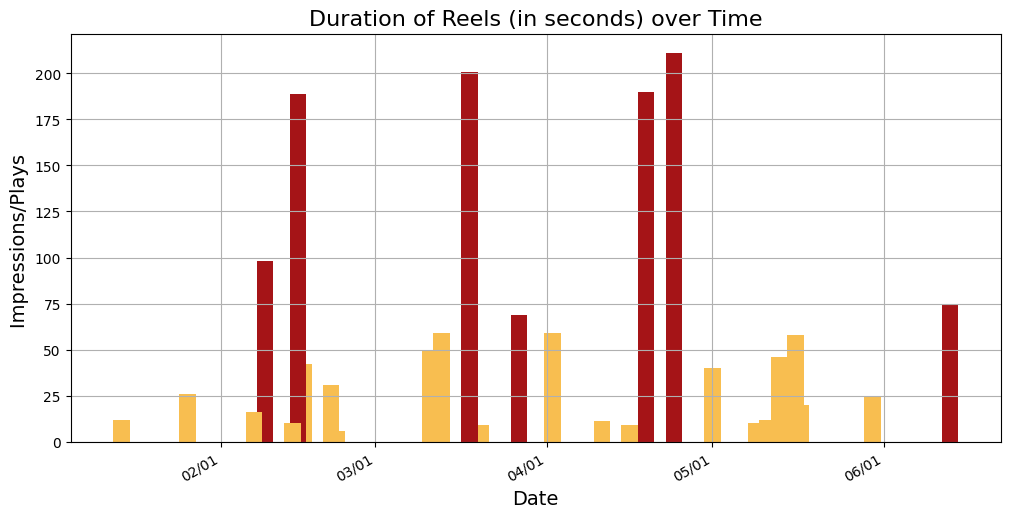

In [46]:
# Convert 'Date' column to datetime format
df_reels['Date'] = pd.to_datetime(df['Date'], format='%m/%d', errors='coerce')
colors = ['#f8be50' if duration < 60 else '#a51417' for duration in df_reels['Video Duration (s)']]

# bar graph
plt.figure(figsize=(12, 6)) 
plt.bar(df_reels['Date'], df_reels['Video Duration (s)'], width=3, color=colors) 
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

plt.title('Duration of Reels (in seconds) over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Impressions/Plays ', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()
# Log scale


plt.show()

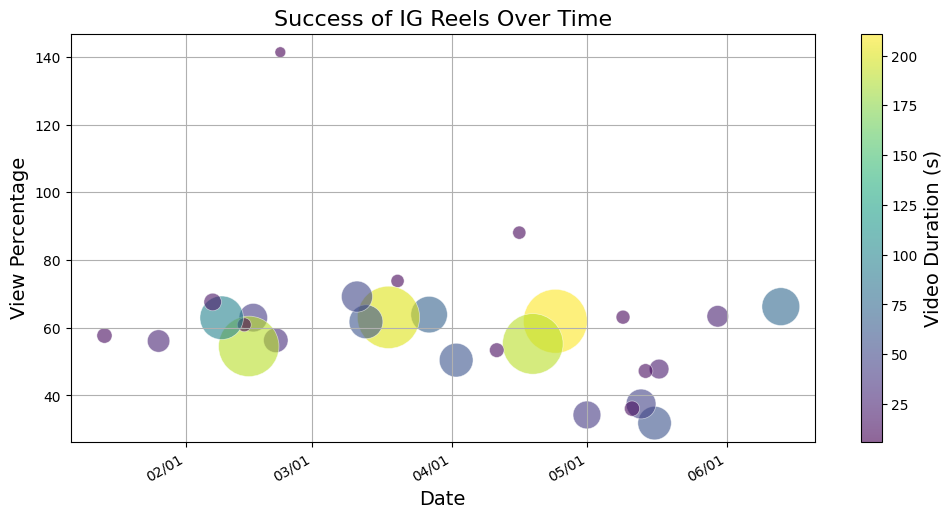

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Sample data creation (assuming df_reels is your DataFrame)
# df_reels = pd.read_csv('your_data.csv')  # Replace with your data loading method

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the scatter plot
scatter = plt.scatter(df_reels['Date'], df_reels['View_Percent'], 
                      s=df_reels['Video Duration (s)']*10,  # Adjust size for better visibility
                      c=df_reels['Video Duration (s)'], cmap='viridis', alpha=0.6, edgecolors='w', linewidth=0.5)

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Video Duration (s)', fontsize=14)

# Title and labels
plt.title('Success of IG Reels Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('View Percentage', fontsize=14)
plt.grid(True)

# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()


### 5. New Followers V.S. Date

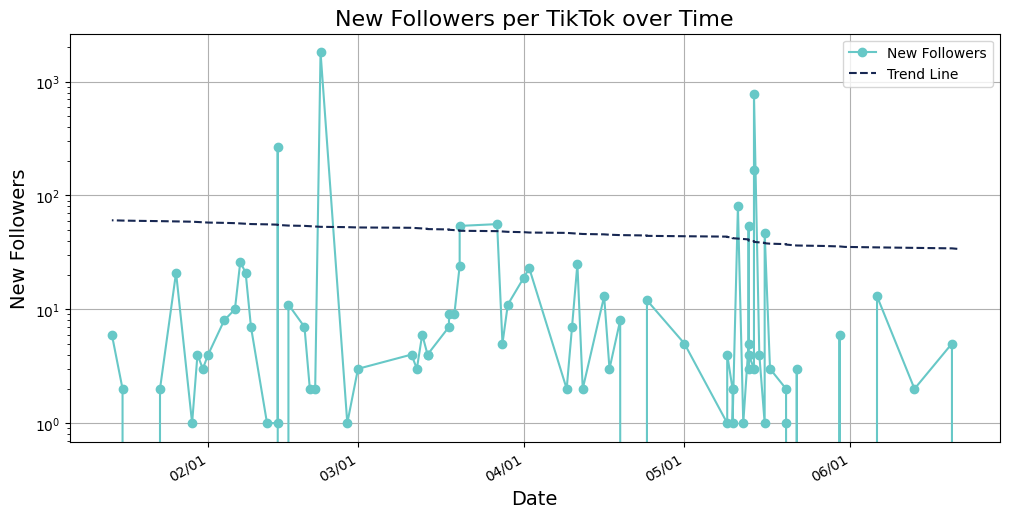

Trend Line Start Value: 33.953797468354416
Trend Line End Value: 60.50189873417722
Average New Followers: 47.22784810126582


In [57]:
df = df.dropna(subset=['Date', 'New Followers'])
df = df[np.isfinite(df['New Followers'])]

# Calculate the average number of new followers
average_new_followers = df['New Followers'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the 'New Followers' over time
plt.plot(df['Date'], df['New Followers'], marker='o', linestyle='-', color='#67c8c7', label='New Followers')

# Calculate the trend line
x = np.arange(len(df['Date']))
y = df['New Followers']
z = np.polyfit(x, y, 1)  # Linear fit
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df['Date'], p(x), linestyle='--', color='#172752', label='Trend Line')

# Title and labels
plt.title('New Followers per IG post over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('New Followers', fontsize=14)
plt.grid(True)
plt.yscale('log')
plt.legend()
# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

# Print the start and end values of the trend line
start_value = p(0)
end_value = p(len(df['Date']) - 1)
print(f"Trend Line Start Value: {start_value}")
print(f"Trend Line End Value: {end_value}")

# Print the average new followers
print(f"Average New Followers: {average_new_followers}")

### 8. Non Followers % v.s Date

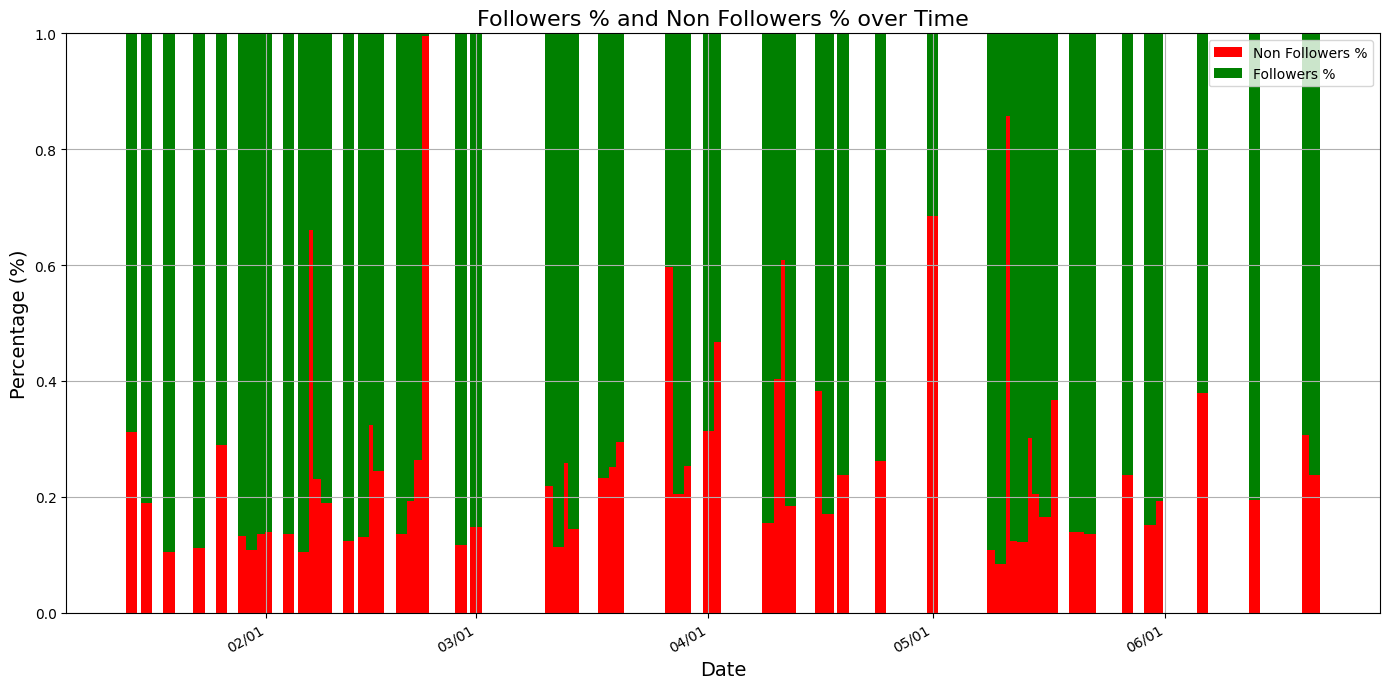

In [58]:
plt.figure(figsize=(14, 7))

df['Followers %'] = 1 - df['Non Followers %']


above_avg_color = 'red'  
plt.bar(df['Date'], df['Non Followers %'], width=1.5, color=above_avg_color, label='Non Followers %')
plt.bar(df['Date'], df['Followers %'], width=1.5, bottom=df['Non Followers %'], color='green', label='Followers %')

plt.title('Followers % and Non Followers % over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45)
plt.ylim(0, 1)  #  y-axis limit to [0, 1] 
plt.grid(True)
plt.legend()
plt.gcf().autofmt_xdate()
# Format the date on the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))

# Automatically rotate the x-axis labels for better readability
plt.gcf().autofmt_xdate()
plt.tight_layout()  
plt.show()

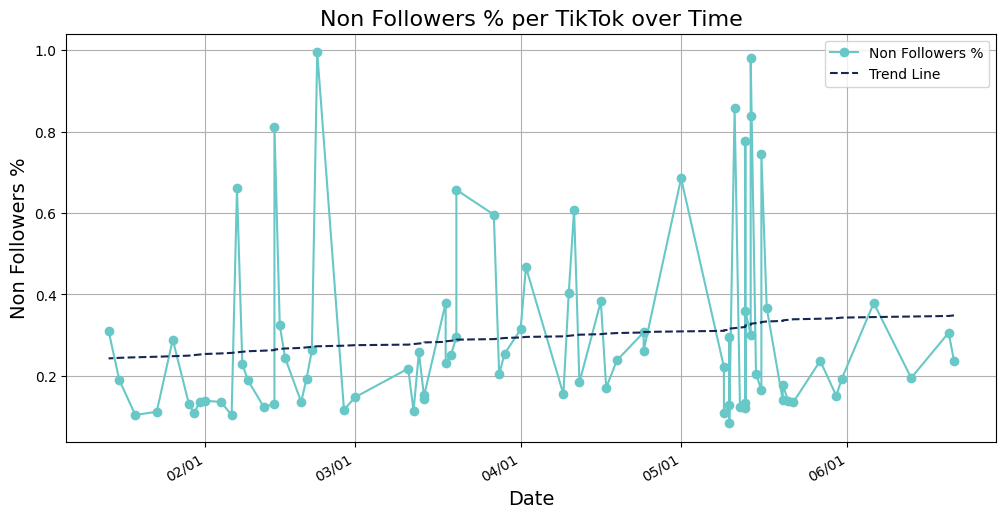

Trend Line Start Value: 0.3485047468354431
Trend Line End Value: 0.24296360759493668
Average Non Followers %: 0.2957341772151899


In [59]:
df = df.dropna(subset=['Date', 'Non Followers %'])
df = df[np.isfinite(df['Non Followers %'])]

# Calculate the average percentage of non-followers
average_non_followers_percent = df['Non Followers %'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the 'Non Followers %' over time
plt.plot(df['Date'], df['Non Followers %'], marker='o', linestyle='-', color='#67c8c7', label='Non Followers %')

# Calculate the trend line
x = np.arange(len(df['Date']))
y = df['Non Followers %']
z = np.polyfit(x, y, 1)  # Linear fit
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df['Date'], p(x), linestyle='--', color='#172752', label='Trend Line')

# Title and labels
plt.title('Non Followers % per IG post over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Non Followers %', fontsize=14)
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

# Print the start and end values of the trend line
start_value = p(0)
end_value = p(len(df['Date']) - 1)
print(f"Trend Line Start Value: {start_value}")
print(f"Trend Line End Value: {end_value}")

# Print the average non-followers percentage
print(f"Average Non Followers %: {average_non_followers_percent}")

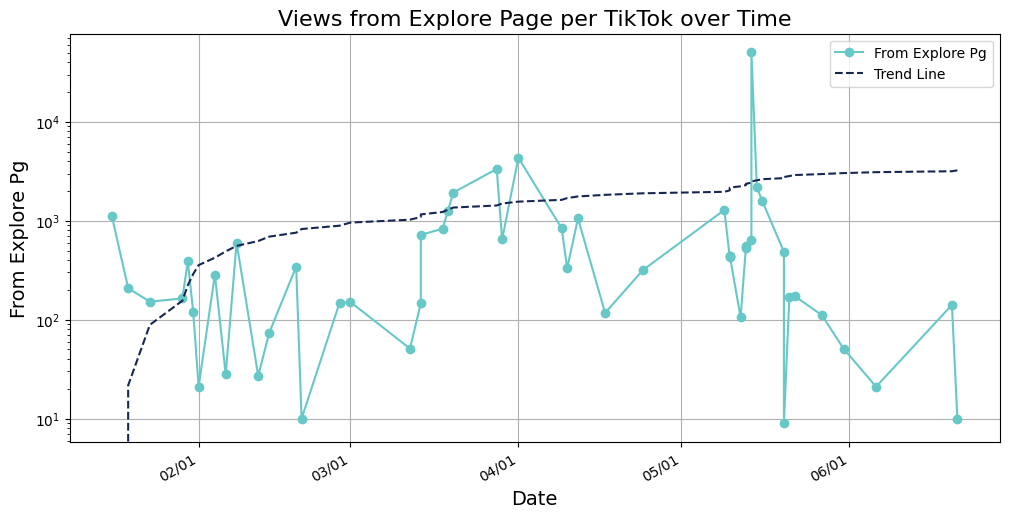

Trend Line Start Value: 3233.4141176470575
Trend Line End Value: -45.254117647060866
Average From Explore Pg: 1594.08


In [65]:
df = df.dropna(subset=['Date', 'from Explore Pg'])
df = df[np.isfinite(df['from Explore Pg'])]

# Calculate the average percentage of views from Explore Page
average_from_explore_pg = df['from Explore Pg'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the 'from Explore Pg' over time
plt.plot(df['Date'], df['from Explore Pg'], marker='o', linestyle='-', color='#67c8c7', label='From Explore Pg')

# Calculate the trend line
x = np.arange(len(df['Date']))
y = df['from Explore Pg']
z = np.polyfit(x, y, 1)  # Linear fit
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df['Date'], p(x), linestyle='--', color='#172752', label='Trend Line')

# Title and labels
plt.title('Views from Explore Page per IG Slideshow over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('From Explore Pg', fontsize=14)
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

# Print the start and end values of the trend line
start_value = p(0)
end_value = p(len(df['Date']) - 1)
print(f"Trend Line Start Value: {start_value}")
print(f"Trend Line End Value: {end_value}")

# Print the average percentage of views from Explore Page
print(f"Average From Explore Pg: {average_from_explore_pg}")

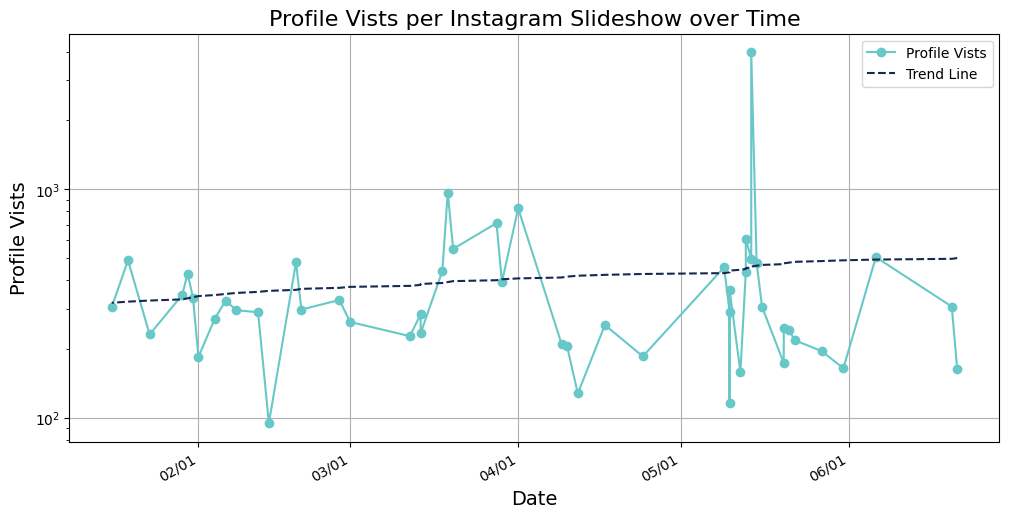

Trend Line Start Value: 500.2447058823527
Trend Line End Value: 318.9552941176468
Average Profile Vists: 409.6


In [68]:
df = df.dropna(subset=['Date', 'Profile Vists'])
df = df[np.isfinite(df['Profile Vists'])]

# Calculate the average number of profile vists
average_vists = df['Profile Vists'].mean()

# Set the figure size
plt.figure(figsize=(12, 6))

# Plot the 'Vists' over time
plt.plot(df['Date'], df['Profile Vists'], marker='o', linestyle='-', color='#67c8c7', label='Profile Vists')

# Calculate the trend line
x = np.arange(len(df['Date']))
y = df['Profile Vists']
z = np.polyfit(x, y, 1)  # Linear fit
p = np.poly1d(z)

# Add the trend line to the plot
plt.plot(df['Date'], p(x), linestyle='--', color='#172752', label='Trend Line')

# Title and labels
plt.title('Profile Vists per Instagram Slideshow over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Profile Vists', fontsize=14)
plt.grid(True)
plt.legend()
plt.yscale('log')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.gcf().autofmt_xdate()
plt.gcf().autofmt_xdate()

# Display the plot
plt.show()

# Print the start and end values of the trend line
start_value = p(0)
end_value = p(len(df['Date']) - 1)
print(f"Trend Line Start Value: {start_value}")
print(f"Trend Line End Value: {end_value}")

# Print the average profile vists
print(f"Average Profile Vists: {average_vists}")

Ways to identify a well performing instagram post:
Reel Views over 100,000 are considered "well performing"
Slideshow Views over 30,000 are considered "well performing"
Single Image Posts do not perform well
Over 110 shares are considered "well performing"
Over 10% for a View-Like Ratio is considered "well performing"
Over 15% for a View-Comment Ratio is considered "well performing"
Over 15% for a View-Bookmark Ratio is considered "well performing"
if over 60% of our audience viewed a reel for it's full duration it is considered "well performing"
Over 60% of our viewers are coming from places outside of our followers list, it is considered "well performing"
Over 1000 views reigning in from the explore page considers a post "well performing"
Over 400 profile visits on a slideshow considers it "well performing"

##Jake calculate New Followers trends for reels and slideshows individually

